## Project Title: A Machine Learning Model for Predicting Customer Churn Using a Telecommunication Dataset

###
 1.0 Loading dataset 

In [51]:
#loading requirements for data cleaning and visualization

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
import warnings
warnings.filterwarnings('ignore')

#loading plotly packages for visualizations
import plotly.express as px
import plotly.io as pio
pio.templates
import plotly.offline as py
from plotly.figure_factory import create_table




In [65]:
pip install pyarrow


Note: you may need to restart the kernel to use updated packages.


In [52]:
#load dataset
df = pd.read_csv(r"C:\Users\anuel\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [53]:
len(df)

7043

In [54]:
#shape of dataset
df.shape

(7043, 21)

In [55]:
#setting up quantiles for statistics
quantiles = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]
df.describe(quantiles)

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
10%,0.000000,2.000000,20.050000
20%,0.000000,6.000000,25.050000
30%,0.000000,12.000000,45.850000
40%,0.000000,20.000000,58.830000
50%,0.000000,29.000000,70.350000
60%,0.000000,40.000000,79.100000


In [20]:
#viewing data set
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes
tenure,1,34,2,45,2,8,22,10,28,62
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes


In [56]:
#more on data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

It was diecovered that Total Charges, which is a numerical data, was listed as an Object datatype and Senior Citizen, which is a categorical variable, was listed as integer in the dataset. It is necessary to change the datatypes of those variables


In [59]:
#converting total charge column from object to numeric datatype and convert numerical values to categorical in Senior Citizen
df["TotalCharges"]  = pd.to_numeric(df['TotalCharges'], errors= "coerce")
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x : 'No' if x == 0 else 'Yes' )

"""The second line of code converts the yes option in the column to 1 and the No entry to 0"""


'The second line of code converts the yes option in the column to 1 and the No entry to 0'

In [58]:
#cross check preprocessing
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [24]:
#check for null entries
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

11 null entries was discovered in the TotalCharge column. There are many recommended ways of handling null entries in machine learning. In this cases, I made use of a common technique which is to remove all the null values. This technique can be readily used when the sum null values is a very small percentage of the dataset. In this case 11/7043

In [60]:
#drop null entries
df = df.dropna()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The null entries in the total charge column has been removed by removing all the entries in those rows containing null values

In [62]:
#to convert all column header to lower case alphabets

df.columns = df.columns.str.lower()
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

# to add (_) to all entries with space
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [63]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu,9305-cdskc,1452-kiovk,6713-okomc,7892-pookp,6388-tabgu,...,9767-fflem,0639-tsiqw,8456-qdavc,7750-eyxwz,2569-wgero,6840-resvb,2234-xaduh,4801-jzazl,8361-ltmkd,3186-ajiek
gender,female,male,male,male,female,female,male,female,female,male,...,male,female,male,female,female,male,female,female,male,male
seniorcitizen,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,...,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
partner,yes,no,no,no,no,no,no,no,yes,no,...,no,no,no,no,no,yes,yes,yes,yes,no
dependents,no,no,no,no,no,no,yes,no,no,yes,...,no,no,no,no,no,yes,yes,yes,no,no
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
phoneservice,no,yes,yes,no,yes,yes,yes,no,yes,yes,...,yes,yes,yes,no,yes,yes,yes,no,yes,yes
multiplelines,no_phone_service,no,no,no_phone_service,no,yes,yes,no_phone_service,yes,no,...,no,yes,no,no_phone_service,no,yes,yes,no_phone_service,yes,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic,fiber_optic,fiber_optic,dsl,fiber_optic,dsl,...,fiber_optic,fiber_optic,fiber_optic,dsl,no,dsl,fiber_optic,dsl,fiber_optic,fiber_optic
onlinesecurity,no,yes,yes,yes,no,no,no,yes,no,yes,...,no,yes,no,no,no_internet_service,yes,no,yes,no,yes


In [64]:
# to create a dataset for visualizations
viz_data = df


## Bivariate analysis and vizualizations

In [29]:

num_cols = [col for col in df.columns if df[col].dtypes != 'O']
num_cols

['tenure', 'monthlycharges', 'totalcharges']

In [30]:
quantiles = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99]
df.describe(quantiles)

,tenure,monthlycharges,totalcharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
10%,2.000000,20.050000,84.600000
20%,6.000000,25.050000,267.070000
30%,12.000000,45.900000,551.995000
40%,20.000000,58.920000,944.170000
50%,29.000000,70.350000,1397.475000
60%,40.000000,79.150000,2048.950000


To understand the relationship between variables in the dataset, I decided to make use of violin plots. The first relationship to explore is the relationship between churn and total charge.

In [46]:
colors = {'No': 'green', 'Yes': 'red'}

# Create violin plot for 'tenure'
fig1 = px.violin(df, x="churn", y="tenure", color="churn", box=True, points="all",
                 title="Relationship between Churn and Tenure", color_discrete_map=colors)
fig1.update_layout(width=800, height=500)  # Adjust the figure size

# Create violin plot for 'totalcharges'
fig2 = px.violin(df, x="churn", y="totalcharges", color="churn", box=True, points="all",
                 title="Relationship between Churn and Total Charges", color_discrete_map=colors)
fig2.update_layout(width=800, height=500)  # Adjust the figure size

# Show both figures
fig1.show()
fig2.show()

for both churn and no-churn, most of the customers of this telecom service are paid total charges less than 2000

In [45]:
#relationship between churn and tenure
colors = {'No': 'green', 'Yes': 'red'}

# Create violin plot with custom colors and increased figure size
fig = px.violin(df, x="churn", y="tenure", color="churn", box=True, points="all",
                title="Relationship between Churn and Tenure", color_discrete_map=colors)
fig.update_layout(width=800, height=500)  # Adjust the figure size
fig.show()

Most customers that left the service where customers on a tenure less than 20


In [47]:

# Create violin plot for 'monthlycharges'
fig = px.violin(df, x="churn", y="monthlycharges", color="churn", box=True, points="all",
                title="Relationship between Churn and Monthly Charges", color_discrete_map=colors)
fig.update_layout(width=800, height=500)  # Adjust the figure size
fig.show()

Most of the customers that churned were customers that subscibed for costly service options, which lead to a higher monthly charge


### Distribution of Categorical variables

Using boxplots, one can explore the distribution of data in the categorical variables

In [39]:
fig = px.box(df, x="tenure", orientation="h", title="Box Plot of Tenure")
fig.show()

In [40]:
fig = px.box(df, x="totalcharges", orientation="h", title="Box Plot of TotalCharges")
fig.show()

In [41]:
fig = px.box(df, x="monthlycharges", orientation="h", title="Box Plot of MonthlyCharges")
fig.show()

In [42]:
fig = px.histogram(df, x="tenure", title="Histogram of Tenure")
fig.show()

In [43]:
fig = px.histogram(df, x="totalcharges", title="Histogram of TotalCharges")
fig.show()

In [49]:
fig = px.histogram(df, x="monthlycharges", color="churn", 
                   title="Distribution of Monthly Charges by Churn Status")
fig.update_layout(width=800, height=500)  # Adjust the figure size
fig.show()

In [ ]:
#aggregating
df.groupby('Churn')[["MonthlyCharges","tenure", "TotalCharges"]].sum().sort_values(by = 'tenure', ascending = False ).head(10)

,MonthlyCharges,tenure,TotalCharges
Churn,,,
No,316530.15,194387,13193241.8
Yes,139130.85,33603,2862926.9


In [ ]:
#top 10 cities by sales
df.groupby(['Contract', 'Churn'])[["MonthlyCharges","tenure", "TotalCharges"]].sum().sort_values(by = 'TotalCharges', ascending = False ).head(10)

MonthlyCharges  tenure  TotalCharges
Contract       Churn                                      
Two year       No           98404.65   93225    6022500.25
One year       No           81678.45   54468    3792062.30
Month-to-month No          136447.05   46694    3378679.25
               Yes         120847.10   23198    1927182.25
One year       Yes          14118.45    7464     674991.20
Two year       Yes           4165.30    2941     260753.45

In [ ]:
df.query("Contract == 'Month-to-month'")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,Yes,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,Yes,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,Yes,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,Yes,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,Male,Yes,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,Yes,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,Yes,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No
7040,4801-JZAZL,Female,Yes,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [ ]:
fig = px.histogram(viz_data, x = "InternetService",y = "TotalCharges",  color = "Contract",
             height = 400, hover_data = ['tenure'], template='plotly_dark')
fig.update_layout(
    title_text='Fiber Optics Generated The Highest Revenue')
fig.show()

In [ ]:

fig = px.scatter(viz_data, x="TotalCharges", y="tenure", color="Churn", facet_col="Contract", trendline="ols")
fig.show()

In [ ]:
df.corr()

,tenure,monthlycharges,totalcharges
tenure,1.000000,0.246862,0.825880
monthlycharges,0.246862,1.000000,0.651065
totalcharges,0.825880,0.651065,1.000000


## CODE REVIEW USING THE MLBOOKCAMP

In [14]:
#convert the churn values from to integers to allow better categorical encoding
"""
The code below will create a pandas series of type boolean and convert it to integers. If the 
boolean correspondes to yes, the astype.int will convert it to 1 and when it is false, it will be converted to zero
"""
df.churn = (df.churn == 'yes').astype(int)

In [15]:
#splitting data into train and test data
from sklearn.model_selection import train_test_split
df_train_full, df_test =  train_test_split(df, test_size = 0.2, random_state = 1)

In [16]:
#splitting the train data set into train and validation
"""
the validation is used during the testing of the model, it is also known as 
the dev test. The validation set is meant to be used during model training and selection and evaluation, while the test set is reserved for final testing of the model
to understand its behaviour when in contact with real world data
"""
df_train, df_val =  train_test_split(df_train_full, test_size = 0.33, random_state = 11)

y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

## 3.1.3 Exploratory data analysis


In [17]:
df_train_full.dtypes

customerid           object
gender               object
seniorcitizen        object
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

No missing value detected 

In [19]:
#checking for distribution of values in the target variable
df_train_full.churn.value_counts()

0    4122
1    1503
Name: churn, dtype: int64

In [20]:
# calculating churn rate
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.267

In [21]:

num_cols = ['tenure', 'monthlycharges', 'totalcharges']


In [22]:
cat_cols = [
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [23]:
df_train_full[cat_cols].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.1.4 Feature Importance

In [24]:
#determining churn rate for gender
female_mean = df_train_full[df_train_full.gender ==  'female'].churn.mean()
print('mean of female customers that churned is', round(female_mean, 3)*100,'%')
      
    
male_mean = df_train_full[df_train_full.gender ==  'male'].churn.mean()
print('mean of male customers that churned is', round(male_mean, 3)*100,"%"  )


mean of female customers that churned is 27.200000000000003 %
mean of male customers that churned is 26.3 %


The global churn rate compared with churn rates among male and female customers yielded a very close result, hence is not very useful in predicting churn

In [25]:
#determining churn rate for partner
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean() 
partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean() 

print('churn rate when partner == yes', round(partner_yes, 3) *100, '%')
print('churn rate when partner == no', round(partner_no, 3) *100, '%')

churn rate when partner == yes 19.900000000000002 %
churn rate when partner == no 33.0 %


This will be very useful for predicting churn

In [26]:
from IPython.display import display
for col in cat_cols:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean']/global_mean
    display(df_group)
    
    
    """note that the ipython display function was used because this is a loop
    """

,mean,diff,risk
gender,,,
female,0.271716,0.004516,1.016900
male,0.262769,-0.004431,0.983415


,mean,diff,risk
seniorcitizen,,,
no,0.236182,-0.031018,0.883915
yes,0.425624,0.158424,1.592905


,mean,diff,risk
partner,,,
no,0.330482,0.063282,1.236835
yes,0.198742,-0.068458,0.743794


,mean,diff,risk
dependents,,,
no,0.313989,0.046789,1.175108
yes,0.157236,-0.109964,0.588460


,mean,diff,risk
phoneservice,,,
no,0.257519,-0.009681,0.963768
yes,0.268211,0.001011,1.003785


,mean,diff,risk
multiplelines,,,
no,0.251210,-0.015990,0.940155
no_phone_service,0.257519,-0.009681,0.963768
yes,0.287199,0.019999,1.074845


,mean,diff,risk
internetservice,,,
dsl,0.194215,-0.072985,0.726852
fiber_optic,0.418848,0.151648,1.567546
no,0.072139,-0.195061,0.269982


,mean,diff,risk
onlinesecurity,,,
no,0.417586,0.150386,1.562823
no_internet_service,0.072139,-0.195061,0.269982
yes,0.150932,-0.116268,0.564864


,mean,diff,risk
onlinebackup,,,
no,0.398703,0.131503,1.492153
no_internet_service,0.072139,-0.195061,0.269982
yes,0.221425,-0.045775,0.828686


,mean,diff,risk
deviceprotection,,,
no,0.390145,0.122945,1.460125
no_internet_service,0.072139,-0.195061,0.269982
yes,0.231601,-0.035599,0.866769


,mean,diff,risk
techsupport,,,
no,0.418934,0.151734,1.567865
no_internet_service,0.072139,-0.195061,0.269982
yes,0.157040,-0.110160,0.587723


,mean,diff,risk
streamingtv,,,
no,0.336908,0.069708,1.260883
no_internet_service,0.072139,-0.195061,0.269982
yes,0.303530,0.036330,1.135967


,mean,diff,risk
streamingmovies,,,
no,0.332297,0.065097,1.243626
no_internet_service,0.072139,-0.195061,0.269982
yes,0.308118,0.040918,1.153137


,mean,diff,risk
contract,,,
month-to-month,0.428155,0.160955,1.602378
one_year,0.119088,-0.148112,0.445688
two_year,0.028868,-0.238332,0.108037


,mean,diff,risk
paperlessbilling,,,
no,0.166376,-0.100824,0.622666
yes,0.336738,0.069538,1.260246


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.165282,-0.101918,0.618572
credit_card_(automatic),0.163097,-0.104103,0.610394
electronic_check,0.456131,0.188931,1.707077
mailed_check,0.184791,-0.082409,0.691583


variables that have quite significant differences, such as onlinesupport, partner, dependents tend to churn more than those that do not have such wide gaps in the risk ratio

## Mutual Information

* With this, we can measure  the degree of dependency between a categorical variable and the target variable.
* Mutual information tells us how much information we learn about one variable if we get to learn the value of the other variable.
* Higher values of mutual information mean a higher degree of dependence: if the mutual information between a categorical variable and the target is high, the categorical variable will be quite useful for predicting the target. 
if the miutual information is low, it means that the categorical variable and the target are independent and thus the variable will not be useful for predicting the target.

In [27]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[cat_cols].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending = False).to_frame(name = 'MI')

df_mi

,MI
contract,0.097114
onlinesecurity,0.064117
techsupport,0.063183
internetservice,0.055333
onlinebackup,0.046461
paymentmethod,0.044772
deviceprotection,0.043555
streamingtv,0.032672
streamingmovies,0.032433
paperlessbilling,0.018651


The following are most useful categories for predicting churn *__contract, onlinesecurity, techsupport, internetservice, onlinebackup__*

### Correlation Coefficient

* Correlation coefficient or Pearson's correlation coefficient can be used to determine the correlation between numerical variables and the target variable. In other to make this possible in this example, the binary target variable is assumed to be numerical.
* The value of the correlation coefficient ranges from -1 to 1
* Positive value means that the variable is directly proportional to the target variable. So in this context, when the values of the variable are high, we will see more of ones than zero and the reverse when the variables are low
* Zero correlation means no relationship between the variables
* A negative correlation occurs when one variable goes up and the other goes down



In [28]:
df_train_full[num_cols].corrwith(df_train_full.churn)

tenure           -0.350139
monthlycharges    0.194926
totalcharges     -0.197277
dtype: float64

* The longer customers stay, the less often they are to churn (tenure = -0.35)
* Customers who pay more tend to leave more often (Monthly charge = 0.19.)

* The longer people stay with the company, the more they have paid in total, so it's less likely that they will leave

* what about the imbalanced dataset?
* write a code to bring out similar display in the book __comparing the numericals with the churn rate in a bar chart__

### 3.2 Feature Engineering
__(transforming all categorical variables to numeric features)__

In [29]:
train_dict = df_train[cat_cols + num_cols].to_dict(orient='rows') 

In [30]:
from sklearn.feature_extraction import DictVectorizer 
dv = DictVectorizer(sparse=False) 
X_train = dv.fit_transform(train_dict)

### 3.3.2 Training Logistic Regression Model
()

In [31]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(solver='liblinear', random_state=1) 
model.fit(X_train, y_train) 

LogisticRegression(random_state=1, solver='liblinear')

In [32]:
# to transform the data for validation
val_dict = df_val[cat_cols + num_cols].to_dict(orient='rows')  
X_val = dv.transform(val_dict) 

In [33]:
# to predict with the model
y_pred = model.predict_proba(X_val)[:, 1] # this will generate a 1-D numpy array with the index 1 column which contains value for probability values for churned


In [34]:
churn = y_pred >= 0.5 # the y_pred is set to a threshold of 0.5. A value below or above will mean less probability to churn or more respectively


In [35]:
acc = np.mean(y_val == churn)
""" this means that 
the model predictions matched
the actual value 80% of the time."""

print(acc)

0.8061389337641357


### 3.3.3 Model Interpretations

In [36]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3))) 

{'contract=month-to-month': 0.442,
 'contract=one_year': -0.094,
 'contract=two_year': -0.484,
 'dependents=no': -0.049,
 'dependents=yes': -0.086,
 'deviceprotection=no': 0.049,
 'deviceprotection=no_internet_service': -0.109,
 'deviceprotection=yes': -0.074,
 'gender=female': -0.007,
 'gender=male': -0.128,
 'internetservice=dsl': -0.362,
 'internetservice=fiber_optic': 0.337,
 'internetservice=no': -0.109,
 'monthlycharges': 0.006,
 'multiplelines=no': -0.212,
 'multiplelines=no_phone_service': 0.097,
 'multiplelines=yes': -0.02,
 'onlinebackup=no': 0.108,
 'onlinebackup=no_internet_service': -0.109,
 'onlinebackup=yes': -0.134,
 'onlinesecurity=no': 0.181,
 'onlinesecurity=no_internet_service': -0.109,
 'onlinesecurity=yes': -0.206,
 'paperlessbilling=no': -0.208,
 'paperlessbilling=yes': 0.073,
 'partner=no': -0.054,
 'partner=yes': -0.081,
 'paymentmethod=bank_transfer_(automatic)': -0.196,
 'paymentmethod=credit_card_(automatic)': -0.026,
 'paymentmethod=electronic_check': 0.266

In [37]:
    """
    training a model on a substet of feature so as to understand how the model works
    """
    
small_subset = ['contract', 'tenure', 'totalcharges'] 
train_dict_small = df_train[small_subset].to_dict(orient='rows') 
dv_small = DictVectorizer(sparse=False) 
dv_small.fit(train_dict_small) 
X_small_train = dv_small.transform(train_dict_small) 

In [38]:
model_small = LogisticRegression(solver='liblinear', random_state=1) 
model_small.fit(X_small_train, y_train) 

LogisticRegression(random_state=1, solver='liblinear')

In [39]:
model_small.intercept_[0] 

-0.4978942349165535

In [40]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3))) 

{'contract=month-to-month': 0.627,
 'contract=one_year': -0.272,
 'contract=two_year': -0.852,
 'tenure': -0.091,
 'totalcharges': 0.001}

## 4.1 Evaluation Metrics
In this part, the goal is to determine whether the model is good or not and what it actually means in terms of model quality.

Evaluation Metrics for Binary Classificationb projects are:
* Classification accuracy
* Confusion table
* ROC Curve and AUC score
In this project, the evaluation of the model is limited just to those metrics

In [41]:
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0,1,11)

for t in thresholds:
    churn = y_pred >= t
    acc = accuracy_score(y_val, churn)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.267
0.10 0.617
0.20 0.735
0.30 0.782
0.40 0.795
0.50 0.806
0.60 0.793
0.70 0.773
0.80 0.739
0.90 0.733
1.00 0.733


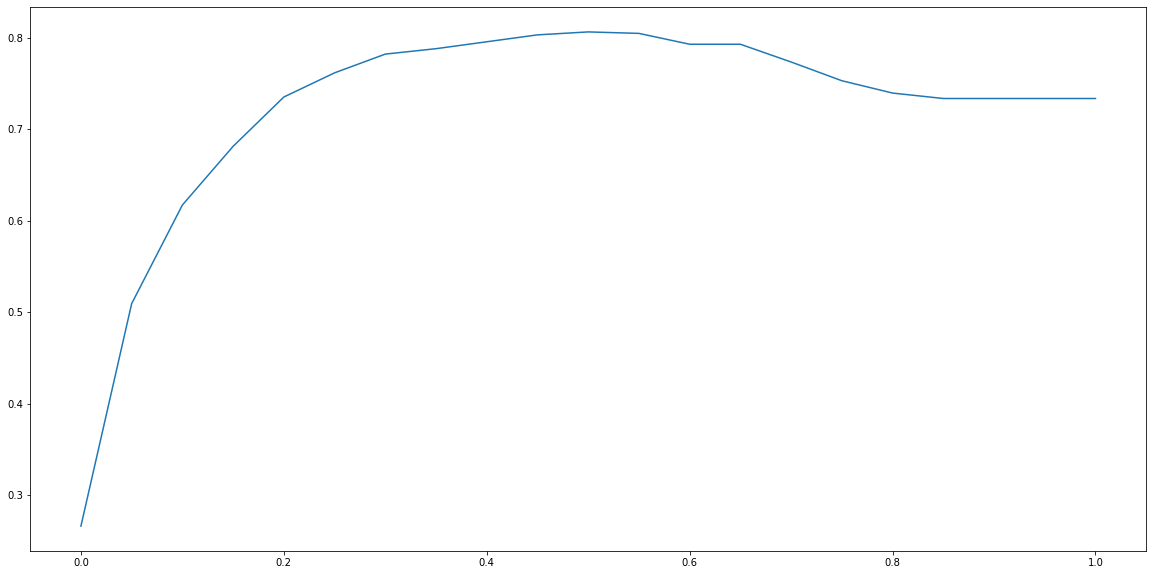

In [42]:
thresholds = np.linspace(0, 1, 21)

accuracies = []

for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)
    
plt.plot(thresholds, accuracies);

In [43]:
# to ascertain the accuracy of the simpler model used for model interpretation
val_dict_small = df_val[small_subset].to_dict(orient='rows') 
X_small_val = dv_small.transform(val_dict_small) 
y_pred_small = model_small.predict_proba(X_small_val)[:, 1] 
churn_small = y_pred_small >= 0.5 
accuracy_score(y_val, churn_small)  


0.7813677975228863

"" __*The large model is 2.5% better than the small model*__ ""

There is a need to relate the model accuracy to something, which in this case would be a baseline model. The dataset contains more of No-churn than churn.
[Read more about class imbalance problem](https://www.chioka.in/class-imbalance-problem/)
* the created baseline model is a dummy model that predicts only no churn (research more on baseline models)
* This model will output False regardless of the features
* The purpose of the model is just to compare with the two other models

In [44]:
size_val = len(y_val)
baseline = np.repeat(False, size_val)
accuracy_score(baseline, y_val)
print("The accuracy of the baseline model is ", accuracy_score(baseline, y_val) *100, "%" )

The accuracy of the baseline model is  73.34410339256866 %


### 4.2 The Confusion Table

Here are the possible outcomes:
* We predict *__False__* and the answer is *__False__*
* We predict *__False__* and the answer is *__True__*
* We predict *__True__* and the answer is *__False__*
* we predict *__True__* and the answer is *__True__*


How to relate this to the confusion matrix:
* __TRUE NEGATIVE (TN)__, We predict *__False__* ('no churn') and the answer is *__False__*  ('no churn)
* __TRUE POSITIVE(TP)__, We predict *__True__* (churn) and the answer is *__True__  ('churn')*
* __FALSE NEGATIVE(FN)__ We predict *__False__* (no churn) and the answer is *__True__*  (churn)
* __FALSE POSITIVE(FP)__, we predict *__True__* (churn) and the answer is *__False__  (no churn)*


In [45]:
# calculating the confusion matrix using Numpy
t = 0.5
predict_churn = (y_pred >= t)
predict_no_churn = (y_pred < t)

actual_churn = (y_val == 1)
actual_no_churn = (y_val == 0)

true_positive = (predict_churn & actual_churn).sum()
false_positive = (predict_churn & actual_no_churn).sum()

false_negative = (predict_no_churn & actual_churn).sum()
true_negative = (predict_no_churn & actual_no_churn).sum()


In [46]:
confusion_table = np.array([[true_negative, false_positive], [false_negative, true_positive]])
confusion_table

array([[1226,  136],
       [ 224,  271]])

In [47]:
(confusion_table / confusion_table.sum())*100


array([[66.02046311,  7.32364028],
       [12.06246634, 14.59343026]])

### 4.2.3 Precision and Recall

Points to note:
* Precision and recall are calculated from the values of the confusion table

* They both help in understanding the quality of the model in cases of class imbalance

* Precision tells how many positive predictions turned out to be correct

* Recall is the fraction of correctly classified poositive examples among all positive examples

In [48]:
Precision = true_positive/(true_positive+false_positive)

Recall = true_positive/(true_positive+false_negative)


print(f'Precision is {Precision*100} %')
print(f'Recall is {Recall*100} %')

Precision is 66.58476658476658 %
Recall is 54.74747474747475 %


Precision: what is the percent of correct predictions among customers predicted as churning? 66.58

Recall: what is the percent of correctly predicted as churning among all churned customers?

#### Summary: precision and recall are very useful metrics but they describe the performance of a classifier only at a certain threshold.

In [49]:
## working with sklearn classification report

from sklearn.metrics import  classification_report
print(classification_report(y_val, model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1362
           1       0.67      0.55      0.60       495

    accuracy                           0.81      1857
   macro avg       0.76      0.72      0.74      1857
weighted avg       0.80      0.81      0.80      1857



### 4.3 ROC Curve and AUC score

ROC stands for Receiver Operating characteristic.

* The ROC Curve depends on two metrics: TPR and FPR or true positive rate and false positive rate.

* FPR = FP/(FP + TN)

* TPR = TP/(TP + FN)

In [50]:
FPR = false_positive/(false_positive + true_negative)

TPR =  true_positive / (true_positive + false_negative)

print(f'FPR is {FPR* 100}%')


print(f'TPR is {TPR* 100}%')

FPR is 9.985315712187958%
TPR is 54.74747474747475%


FPR is the fraction of users we predicted as churning among everybody who did not churn. A small value for FPR tells us that a model is good.

TPR is the fraction of users who we predicted as churning among everybody who actually did churn. The higher the TPR the better

__Note__: There is a need to calculate TPR and FPR for many thresholds so as to plot ROC curve. The current threshold so far is 0.5

In [51]:
# to create a list of thresholds for the confusion matrices
scores = []
thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

In [52]:
# turn the list to a pandas dataframe and set columns
#this is because it is easier to work with a dataframe than with a list of tuples
df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [53]:
df_scores[ : :10]

,threshold,tp,fp,fn,tn
0,0.0,495,1362,0,0
10,0.1,470,686,25,676
20,0.2,427,424,68,938
30,0.3,386,296,109,1066
40,0.4,327,212,168,1150
50,0.5,271,136,224,1226
60,0.6,194,84,301,1278
70,0.7,102,28,393,1334
80,0.8,16,5,479,1357
90,0.9,0,0,495,1362


In [54]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [55]:
df_scores[:: 10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,495,1362,0,0,1.000000,1.000000
10,0.1,470,686,25,676,0.949495,0.503671
20,0.2,427,424,68,938,0.862626,0.311307
30,0.3,386,296,109,1066,0.779798,0.217327
40,0.4,327,212,168,1150,0.660606,0.155653
50,0.5,271,136,224,1226,0.547475,0.099853
60,0.6,194,84,301,1278,0.391919,0.061674
70,0.7,102,28,393,1334,0.206061,0.020558
80,0.8,16,5,479,1357,0.032323,0.003671
90,0.9,0,0,495,1362,0.000000,0.000000


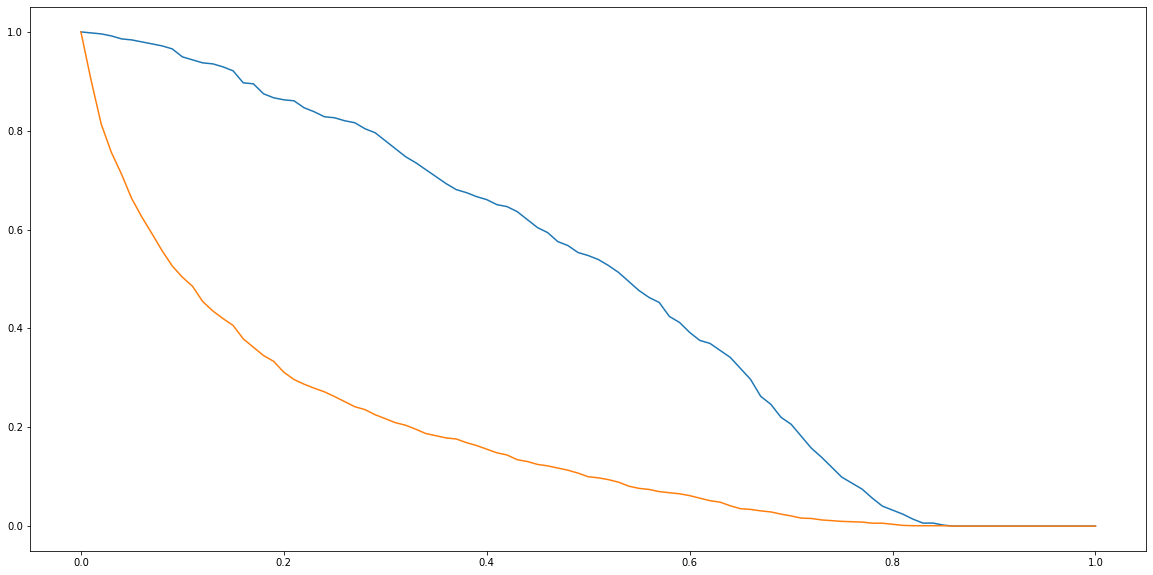

In [97]:
plt.plot(df_scores.threshold, df_scores.tpr, label = 'TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label = 'FPR')
plt.legend;

### 4.3.3 Random Baseline Model
A random model outputs a random score between 0 and 1 regardless of the inpt

In [56]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size =len(y_val))

In [57]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    
    thresholds = np.linspace(0, 1, 101)
    
    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()
        scores.append((t, tp, fp, fn, tn))
        
        df_scores = pd.DataFrame(scores)
        
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    
    df_scores['tpr'] = df_scores.tp/(df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores
        
        

In [58]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [59]:
df_scores_small = tpr_fpr_dataframe(y_val,y_pred_small)

In [60]:
df_rand [ :: 10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,495,1362,0,0,1.000000,1.000000
10,0.1,441,1233,54,129,0.890909,0.905286
20,0.2,396,1096,99,266,0.800000,0.804699
30,0.3,351,959,144,403,0.709091,0.704112
40,0.4,307,829,188,533,0.620202,0.608664
50,0.5,253,708,242,654,0.511111,0.519824
60,0.6,203,568,292,794,0.410101,0.417034
70,0.7,146,427,349,935,0.294949,0.313510
80,0.8,100,299,395,1063,0.202020,0.219530
90,0.9,53,150,442,1212,0.107071,0.110132


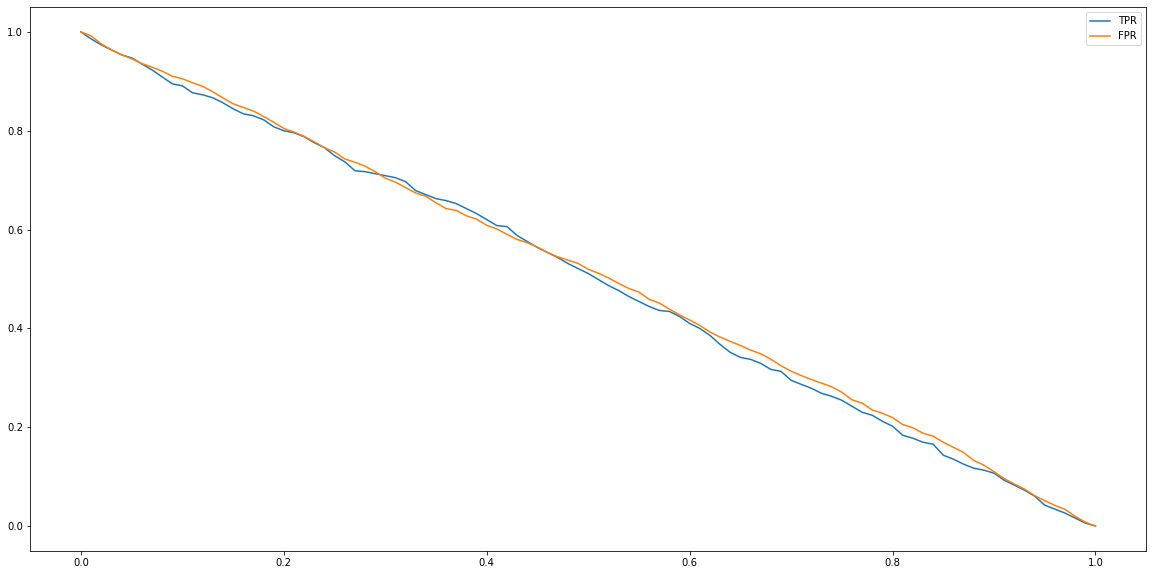

In [103]:
plt.plot(df_rand.threshold, df_rand.tpr, label = 'TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label = 'FPR')
plt.legend();

#### 4.3.4 The Ideal Model
This model always makes correct decisions.
* This model is useful for comparing the trained model TPR and FPR with that of the ideal model

In [61]:
# to generate ideal predictions
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)

In [62]:
df_ideal [: : 10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,495,1362,0,0,1.000000,1.000000
10,0.1,495,1176,0,186,1.000000,0.863436
20,0.2,495,990,0,372,1.000000,0.726872
30,0.3,495,805,0,557,1.000000,0.591043
40,0.4,495,619,0,743,1.000000,0.454479
50,0.5,495,434,0,928,1.000000,0.318649
60,0.6,495,248,0,1114,1.000000,0.182085
70,0.7,495,62,0,1300,1.000000,0.045521
80,0.8,372,0,123,1362,0.751515,0.000000
90,0.9,186,0,309,1362,0.375758,0.000000


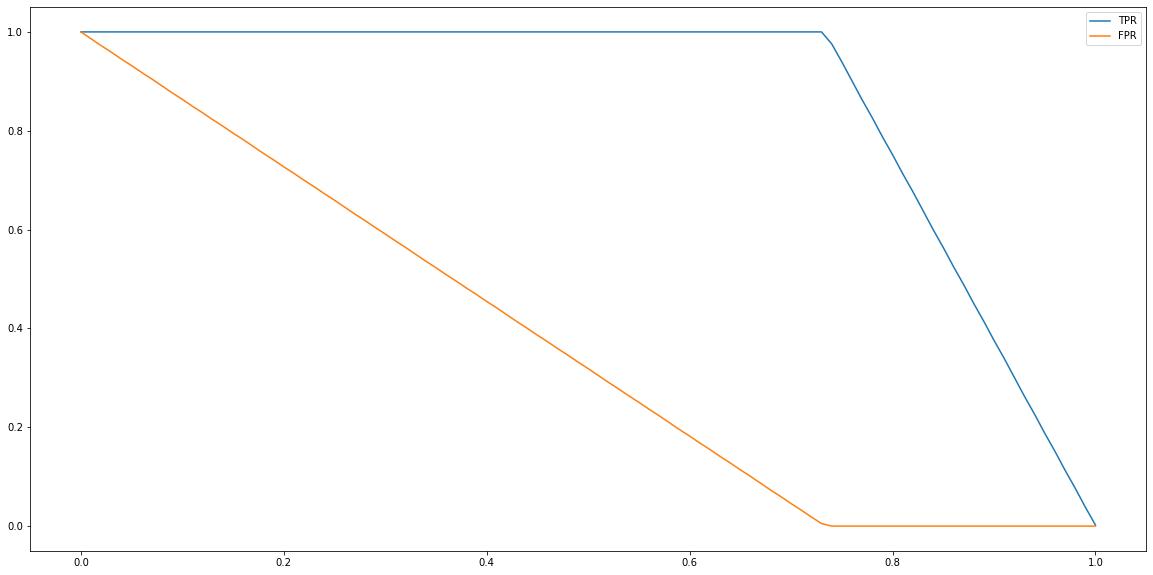

In [63]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR') 
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR') 
plt.legend() ;

#### __4.3.5 ROC Curve__

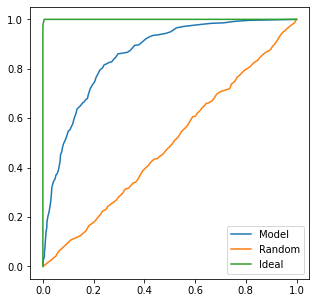

In [64]:
plt.figure(figsize=(5, 5)) 
plt.plot(df_scores.fpr, df_scores.tpr, label='Model') 
plt.plot(df_rand.fpr, df_rand.tpr, label='Random') 
plt.plot(df_ideal.fpr, df_ideal.tpr, label='Ideal') 
plt.legend() ;

The model is expected to be as close to the ideal spot as possible.

In the next plot, the ideal plot will be removed and the random plot will be replaced by a straight line

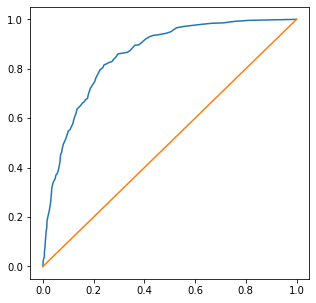

In [65]:
plt.figure(figsize = (5, 5))
plt.plot(df_scores.fpr, df_scores.tpr)
plt.plot([0, 1], [0, 1]);

Note that we can achieve the above using the roc_curve function in sklearn\



In [66]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

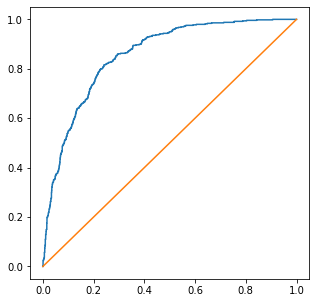

In [67]:
plt.figure( figsize= (5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1]);

Doing this totally removes the work of calculating thresholds for the roc curve

The ROC_CURVE can also be used for comparing multiple models with each . other. The model with a curve closer to the ideal point of (0, 1) is to be preferred.

In [68]:
fpr_large, tpr_large, _ = roc_curve(y_val, y_pred) 
fpr_small, tpr_small, _ = roc_curve(y_val, y_pred_small) 

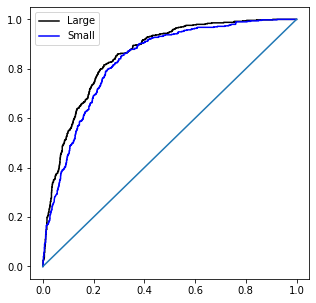

In [96]:
plt.figure(figsize=(5, 5)) 
plt.plot(fpr_large, tpr_large, color='black', label='Large') 
plt.plot(fpr_small, tpr_small, color='blue', label='Small') 
plt.plot([0, 1], [0, 1]) 
plt.legend() ;

### 4.3.6 Area under the ROC Curve (AUC)


The AUC is the default classification metric in most situations, and its often the metric we use when finding the best parameter set for models.

* The AUC gives the probability that a randomly selected posiitive example will have a score higher than a randomly selected negative example

In [70]:
from sklearn.metrics import auc
auc(df_scores.fpr, df_scores.tpr)

0.8551943814058351

In [71]:
auc(df_scores_small.fpr,df_scores_small.tpr )

0.8322142126106884

In [72]:
# an alternative
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.8554769427016122

### 4.4 Parameter tuning

#### K-fold cross-validation

In [116]:
def train(df, y):
    cat = df[cat_cols + num_cols].to_dict(orient = 'rows')
    
    dv = DictVectorizer(sparse = False)
    dv.fit(cat)
    
    X= dv.transform(cat)
    model = LogisticRegression(solver = 'liblinear')
    model.fit(X, y)
    
    return dv, model

In [117]:
def predict(df, dv, model):
    cat = df[cat_cols + num_cols].to_dict(orient = 'rows')
    
    X= dv.transform(cat)
    y_pred = model.predict_proba(X)[ : , 1]
    
    return y_pred

In [118]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 10, shuffle = True, random_state = 1)

aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]
    
    y_train = df_train.churn.values
    y_val = df_val.churn.values
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)
    
    

In [119]:
auc

0.8547298891247936

In [120]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs))) 

auc = 0.844 ± 0.013


#### Finding Best Parameters

In [121]:
def train(df, y, C):
    cat = df[cat_cols + num_cols].to_dict(orient = 'rows')
    
    dv = DictVectorizer(sparse = False)
    dv.fit(cat)
    
    X = dv.transform(cat)
    
    model = LogisticRegression(solver = 'liblinear', C=C)
    
    model.fit(X,y)
    
    return dv, model

In [122]:
nfolds = 10
kfold = KFold(n_splits = nfolds, shuffle=True, random_state = 1)

for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []
    
    for train_idz, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx].reset_index(drop = True)
        df_val = df_train_full.iloc[val_idx].reset_index(drop = True)
        
        y_train = df_train.churn.values
        y_val = df_val.churn.values
        
        dv,model = train(df_train, y_train, C = C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        
        aucs.append(auc)
        
    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.828 ± 0.013
C=0.01, auc = 0.845 ± 0.012
C=0.1, auc = 0.847 ± 0.013
C=0.5, auc = 0.847 ± 0.013
C=1, auc = 0.847 ± 0.013
C=10, auc = 0.847 ± 0.013


In [124]:
y_train = df_train_full.churn.values
y_test = df_test.churn.values

dv, model = train(df_train_full, y_train, C = 0.5)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)

In [125]:
print('auc = %.3f' % auc)

auc = 0.847


### Exercises

In [80]:
# to create a list if threshholds for calculating the precision, recall and F1
def P_and_R_dataframe(y_val, y_pred):

    scores = []
    thresholds = np.linspace(0,1,101)

    for t in thresholds:
        
        predict_churn = (y_pred >= t)
        predict_no_churn = (y_pred < t)

        actual_churn = (y_val == 1)
        actual_no_churn = (y_val == 0)

        tp = (predict_churn & actual_churn).sum()
        fp = (predict_churn & actual_no_churn).sum()

        fn = (predict_no_churn & actual_churn).sum()
        tn = (predict_no_churn & actual_no_churn).sum()
        
        
        scores.append((t, tp, fp, fn, tn))
        
        df_scores = pd.DataFrame(scores)
        
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    
    df_scores['Precision'] =  df_scores.tp/(df_scores.tp+df_scores.fp)
    df_scores['Recall'] = df_scores.tp/(df_scores.tp+df_scores.fn)
    df_scores['F1'] = 2*df_scores.Precision*df_scores.Recall/(df_scores.Precision + df_scores.Recall)
    
    return df_scores

In [85]:
df_pr = P_and_R_dataframe(y_val, y_pred)

In [82]:
df_pr[ : : 10]

,threshold,tp,fp,fn,tn,Precision,Recall,F1
0,0.0,495,1362,0,0,0.266559,1.000000,0.420918
10,0.1,470,686,25,676,0.406574,0.949495,0.569352
20,0.2,427,424,68,938,0.501763,0.862626,0.634473
30,0.3,386,296,109,1066,0.565982,0.779798,0.655905
40,0.4,327,212,168,1150,0.606679,0.660606,0.632495
50,0.5,271,136,224,1226,0.665848,0.547475,0.600887
60,0.6,194,84,301,1278,0.697842,0.391919,0.501940
70,0.7,102,28,393,1334,0.784615,0.206061,0.326400
80,0.8,16,5,479,1357,0.761905,0.032323,0.062016
90,0.9,0,0,495,1362,NaN,0.000000,NaN


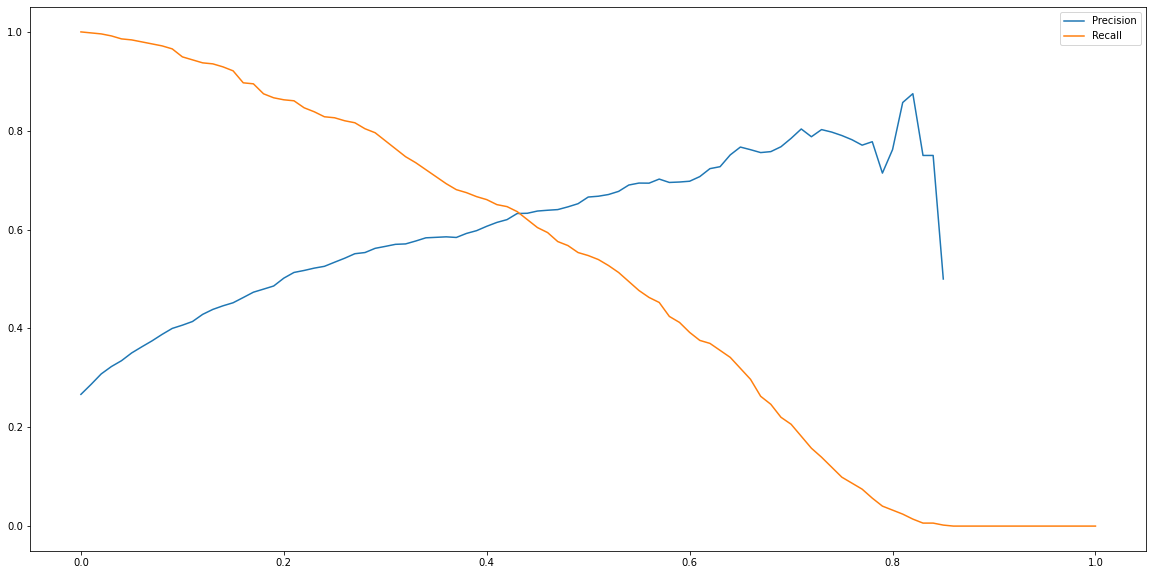

In [83]:
plt.plot(df_pr.threshold, df_pr.Precision, label = 'Precision')
plt.plot(df_pr.threshold, df_pr.Recall, label = 'Recall')
plt.legend();

#### Plotting PR curves for the main model
[Read up more about PR Curves](https://sinyi-chou.github.io/classification-pr-curve/?fireglass_rsn=true)

Lager PR AUC value indicates better model performance

In [91]:
from sklearn.metrics import average_precision_score, precision_recall_curve

In [86]:
df_rand_pr = P_and_R_dataframe(y_val, y_rand)

In [87]:
df_ideal_pr =  P_and_R_dataframe(y_ideal, y_pred_ideal)

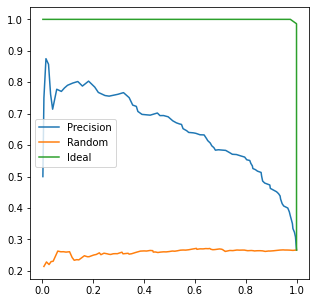

In [89]:
plt.figure(figsize=(5, 5)) 
plt.plot(df_pr.Recall, df_pr.Precision, label = 'Precision') 
plt.plot(df_rand_pr.Recall, df_rand_pr.Precision,  label='Random') 
plt.plot(df_ideal_pr.Recall, df_ideal_pr.Precision,  label='Ideal') 
plt.legend() ;

In [93]:
average_precision = average_precision_score(y_val, y_pred)
print(average_precision)

0.655047243094989


In [94]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_val, y_pred)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.6539011312103443


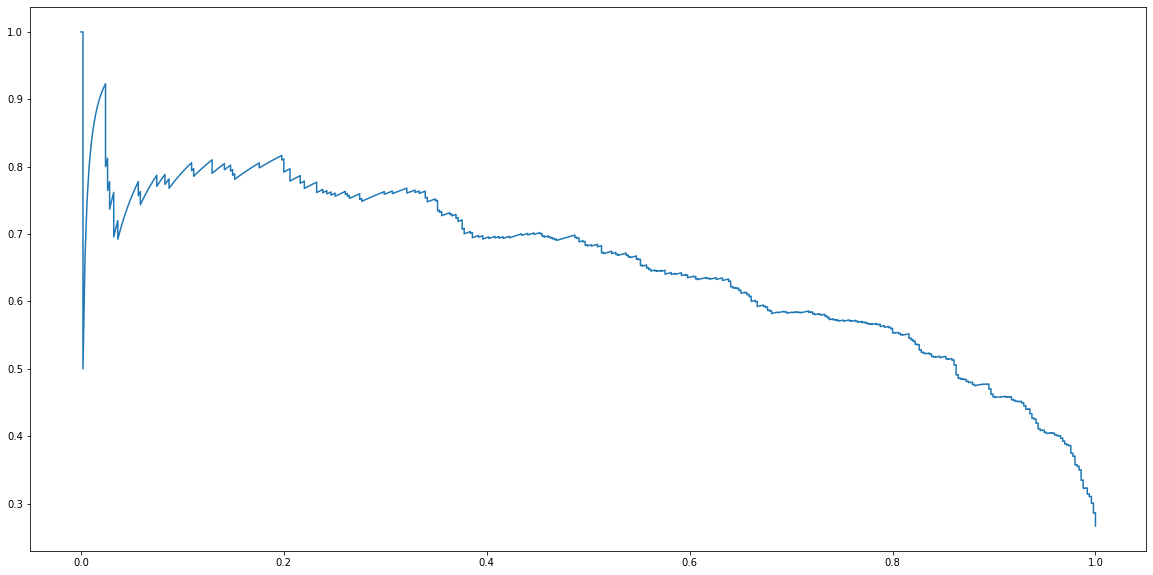

In [95]:
plt.plot(recall, precision)
plt.show()

### remember to use SMOTE to correct the imbalance in this dataset and then train the model on a balanced dataset

## MODEL BUILDING

In [31]:
#loading preprocessing 
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

In [32]:
#utilizing label encoder to turn categorical values to numbers. This is because there is a ordinal categorical variable. The Contract column
le = LabelEncoder()
for col in df:
    if (df[col].dtype=="object") and (df[col].nunique()>=3):
         df[col] = le.fit_transform(df[col])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   int32  
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   int32  
 8   InternetService   7032 non-null   int32  
 9   OnlineSecurity    7032 non-null   int32  
 10  OnlineBackup      7032 non-null   int32  
 11  DeviceProtection  7032 non-null   int32  
 12  TechSupport       7032 non-null   int32  
 13  StreamingTV       7032 non-null   int32  
 14  StreamingMovies   7032 non-null   int32  
 15  Contract          7032 non-null   int32  
 16  PaperlessBilling  7032 non-null   object 


In [34]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,5365,3953,2558,5524,6500,6540,1001,4760,5593,4524,...,6864,437,5984,5493,1756,4843,1524,3358,5923,2221
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,1,0,0,1,0,2,2,1,2,0,...,0,2,0,1,0,2,2,1,2,0
InternetService,0,0,0,0,1,1,1,0,1,0,...,1,1,1,0,2,0,1,0,1,1
OnlineSecurity,0,2,2,2,0,0,0,2,0,2,...,0,2,0,0,1,2,0,2,0,2


In [35]:
# turning all categorical variables to dummy numbers
df = pd.get_dummies(df,columns=[k for k in df.columns 
                                   if df[k].dtypes=='O'],
                                          drop_first=True)  

In [36]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,5365.00,3953.00,2558.00,5524.00,6500.00,6540.00,1001.00,4760.00,5593.00,4524.00,...,6864.00,437.00,5984.00,5493.00,1756.00,4843.00,1524.00,3358.00,5923.00,2221.00
tenure,1.00,34.00,2.00,45.00,2.00,8.00,22.00,10.00,28.00,62.00,...,38.00,67.00,19.00,12.00,72.00,24.00,72.00,11.00,4.00,66.00
MultipleLines,1.00,0.00,0.00,1.00,0.00,2.00,2.00,1.00,2.00,0.00,...,0.00,2.00,0.00,1.00,0.00,2.00,2.00,1.00,2.00,0.00
InternetService,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,...,1.00,1.00,1.00,0.00,2.00,0.00,1.00,0.00,1.00,1.00
OnlineSecurity,0.00,2.00,2.00,2.00,0.00,0.00,0.00,2.00,0.00,2.00,...,0.00,2.00,0.00,0.00,1.00,2.00,0.00,2.00,0.00,2.00
OnlineBackup,2.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,...,0.00,2.00,0.00,2.00,1.00,0.00,2.00,0.00,0.00,0.00
DeviceProtection,0.00,2.00,0.00,2.00,0.00,2.00,0.00,0.00,2.00,0.00,...,0.00,2.00,0.00,2.00,1.00,2.00,2.00,0.00,0.00,2.00
TechSupport,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,2.00,0.00,...,0.00,0.00,0.00,2.00,1.00,2.00,0.00,0.00,0.00,2.00
StreamingTV,0.00,0.00,0.00,0.00,0.00,2.00,2.00,0.00,2.00,0.00,...,0.00,2.00,2.00,2.00,1.00,2.00,2.00,0.00,0.00,2.00
StreamingMovies,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,...,0.00,0.00,0.00,2.00,1.00,2.00,2.00,0.00,0.00,2.00


In [37]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df)

array([[ 0.91110011, -1.28024804,  0.0626661 , ..., -3.05633383,
         0.82893915, -0.60166339],
       [ 0.21552111,  0.06430269, -0.99156363, ...,  0.32718939,
        -1.20636117, -0.60166339],
       [-0.47168335, -1.23950408, -0.99156363, ...,  0.32718939,
         0.82893915,  1.66205891],
       ...,
       [-0.0775876 , -0.87280842,  0.0626661 , ..., -3.05633383,
         0.82893915, -0.60166339],
       [ 1.1859819 , -1.15801615,  1.11689584, ...,  0.32718939,
         0.82893915,  1.66205891],
       [-0.63769619,  1.36810945, -0.99156363, ...,  0.32718939,
         0.82893915, -0.60166339]])

In [38]:
# features and target
X=df.drop('Churn_Yes', axis = 'columns')
Y=df.Churn_Yes
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)
print("train data length:",len(X_train))
print("test data length:",len(X_test))

train data length: 4922
test data length: 2110


In [39]:
#lazy classifier
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric = None)
models,predictions = clf.fit(X_train,X_test,Y_train,Y_test)

100%|██████████| 29/29 [00:15<00:00,  1.85it/s]


In [40]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.76,0.76,0.76,0.77,0.05
GaussianNB,0.75,0.75,0.75,0.76,0.05
NearestCentroid,0.71,0.74,0.74,0.73,0.02
BernoulliNB,0.75,0.73,0.73,0.76,0.06
LogisticRegression,0.80,0.73,0.73,0.80,0.03
PassiveAggressiveClassifier,0.71,0.72,0.72,0.72,0.06
LinearSVC,0.80,0.72,0.72,0.80,0.37
CalibratedClassifierCV,0.80,0.72,0.72,0.80,0.95
AdaBoostClassifier,0.80,0.71,0.71,0.79,0.62


In [41]:
#using logistics regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#model training
model.fit(X_train,Y_train)
predictions = model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(Y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1560
           1       0.62      0.56      0.59       550

    accuracy                           0.80      2110
   macro avg       0.73      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110

Predicted labels:  [0 1 0 ... 0 0 0]
Accuracy:  0.795734597156398


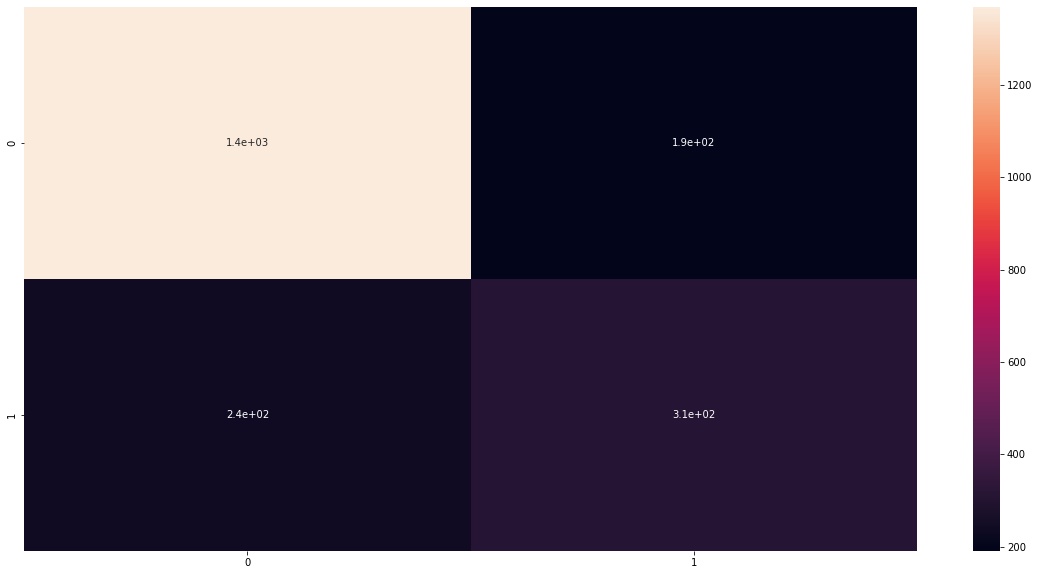

<Figure size 576x576 with 0 Axes>

In [43]:
#using confusion matrix
sns.heatmap(confusion_matrix(Y_test,predictions), annot=True)
plt.figure(figsize=(8,8));
plt.show();

No handles with labels found to put in legend.


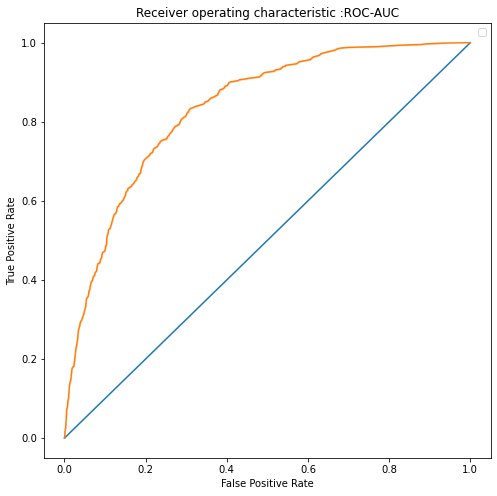

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve
y_scores = model.predict_proba(X_test)
# calculate ROC curve
plt.figure(figsize=(8,8))
fpr, tpr, thresholds = roc_curve(Y_test, y_scores[:,1])
sns.lineplot([0,1], [0,1])
sns.lineplot(fpr, tpr)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic :ROC-AUC")
plt.legend()
plt.show()


In [45]:
auc = roc_auc_score(Y_test, y_scores[:,1])
print(auc)

0.8339522144522145


In [ ]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

In [ ]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()